# AAPG SC UPer - GEOPHODTRON 2024
## Machine Learning for Geospatial Data
### By : <font color='red'>Erwin Fernanda</font> 
#### <font color='blue'>Data and Machine Learning Engineer at Medco E & P Indonesia<font>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#1.-Business-Understanding" data-toc-modified-id="1.-Business-Understanding"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span></li>
        <li><span><a href="#2.-Data-Understanding" data-toc-modified-id="2.-Data-Undertansding"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Understanding</a></span></li>
        <li><span><a href="#3.-Data-Preparation" data-toc-modified-id="3.-Data-Preparation"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span></li>
        <li><span><a href="#4.-Exploratory-Data-Analysis" data-toc-modified-id="4.-Exploratory-Data-Analysis"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li>
        <li><span><a href="#5.-Modelling" data-toc-modified-id="5.-Modelling"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span></li>
        <li><span><a href="#6.-Evaluation-Model" data-toc-modified-id="6.-Evaluation-Model"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evaluation Model</a></span></li>

# 0. Import Module

In [190]:
# Data Processing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.tree import *

# 1. Business Understanding

Based on the regulation of <b>One Map Indonesia Policy </b>, there are more geoscientist who have responsbility to mapping especially in lithology. But, the problem is

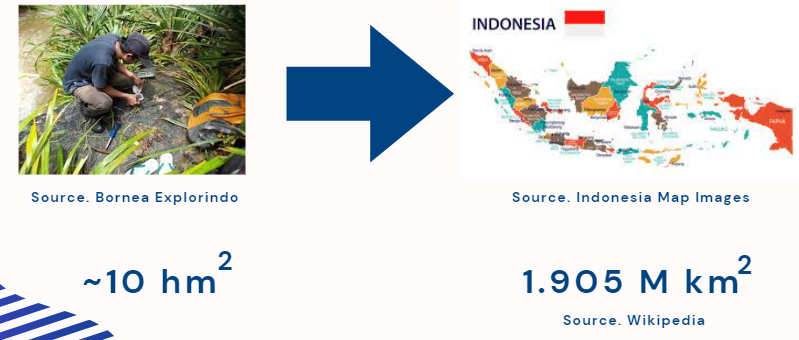

So, to solve this problem with consider several aspects like budget, resource, time, etc, we can use machine learning to mapping lithology. Here, the overview about study case:

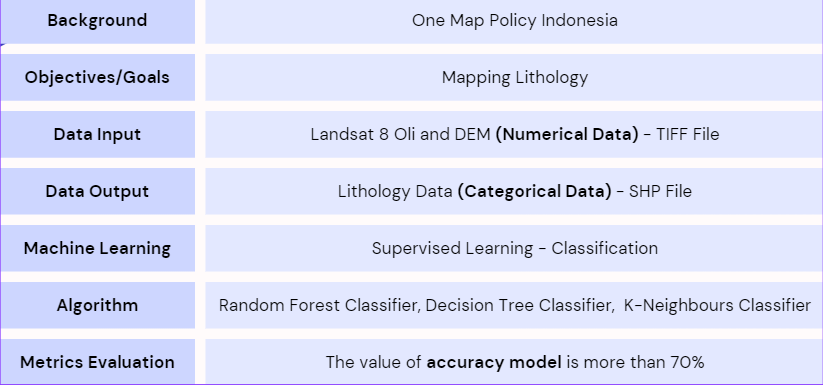

# 2. Data Understanding

The several data that we used is:

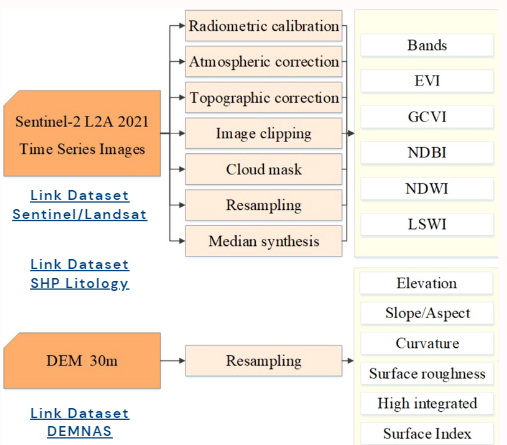

This is the reference literature to support this project.

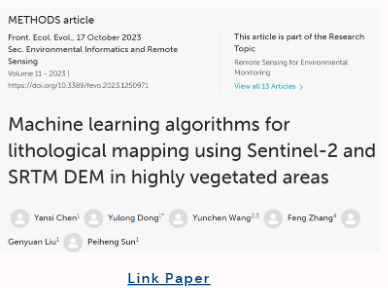

In [ ]:
dataset_raw = pd.read_excel('Dataset/data_train.xlsx')

In [9]:
dataset = dataset_raw.copy()

# 3. Data Preparation

## 3.1. Data Cleaning

### 3.1.1. Data Null

In [10]:
dataset.isnull().sum()

longitude         0
latitude          0
band_1       134921
band_2       134921
band_3       134921
band_4       134921
band_5       134921
band_6       134921
band_7       134921
band_8       134921
gcvi         134921
ndbi         134921
mndwi        134921
ndmi         134921
lswi         134921
lithology    134939
dtype: int64

In [11]:
dataset.dropna(inplace=True)
dataset

,longitude,latitude,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,gcvi,ndbi,mndwi,ndmi,lswi,lithology
0,401705.0,9135585,10217.894531,9190.894531,8345.894531,7266.894531,18536.894531,10657.894531,7224.894531,7839.894531,-0.060629,-0.269727,-0.121556,0.269727,-0.529450,Sandstone
4,408155.0,9148235,9652.112305,8666.112305,7840.112305,6874.112305,15347.112305,9524.112305,6977.112305,7413.112305,-0.054464,-0.233978,-0.096893,0.233978,-0.542735,Sandstone
8,404305.0,9131785,10535.749023,9489.749023,8625.749023,7553.749023,17332.750000,10223.749023,7025.749023,8161.749023,-0.053792,-0.257825,-0.084703,0.257825,-0.520420,Sandstone
10,397055.0,9126785,11898.645508,10979.645508,9991.645508,9305.645508,15723.645508,12117.645508,9244.645508,9564.645508,-0.042736,-0.129451,-0.096095,0.129451,-0.372010,Conglomerate
13,410905.0,9141085,10207.564453,9266.564453,8476.564453,7737.564941,13935.564453,10985.564453,8165.564941,7952.564941,-0.061817,-0.118293,-0.128805,0.118293,-0.518406,Sandstone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276260,411605.0,9124385,10866.531250,10005.531250,9134.531250,8834.531250,10732.531250,7752.531738,6418.531738,8988.531250,-0.015983,-0.161064,0.081756,0.161064,-0.467656,Conglomerate
276261,412805.0,9120035,11160.316406,10399.316406,9921.316406,10035.316406,15049.316406,15623.316406,11777.316406,9887.316406,-0.003427,0.018703,-0.223065,-0.018703,-0.422737,Conglomerate
276262,410505.0,9147035,9921.672852,8954.672852,8118.672852,7467.672852,13161.672852,9898.672852,7605.672852,7824.672852,-0.036213,-0.141396,-0.098702,0.141396,-0.528219,Sandstone
276263,411055.0,9140935,10403.692383,9436.692383,8591.692383,7879.692871,14682.692383,11543.692383,8534.692383,7955.692871,-0.074025,-0.119613,-0.146487,0.119613,-0.507294,Sandstone


In [12]:
dataset.reset_index(drop=True, inplace=True)
dataset

,longitude,latitude,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,gcvi,ndbi,mndwi,ndmi,lswi,lithology
0,401705.0,9135585,10217.894531,9190.894531,8345.894531,7266.894531,18536.894531,10657.894531,7224.894531,7839.894531,-0.060629,-0.269727,-0.121556,0.269727,-0.529450,Sandstone
1,408155.0,9148235,9652.112305,8666.112305,7840.112305,6874.112305,15347.112305,9524.112305,6977.112305,7413.112305,-0.054464,-0.233978,-0.096893,0.233978,-0.542735,Sandstone
2,404305.0,9131785,10535.749023,9489.749023,8625.749023,7553.749023,17332.750000,10223.749023,7025.749023,8161.749023,-0.053792,-0.257825,-0.084703,0.257825,-0.520420,Sandstone
3,397055.0,9126785,11898.645508,10979.645508,9991.645508,9305.645508,15723.645508,12117.645508,9244.645508,9564.645508,-0.042736,-0.129451,-0.096095,0.129451,-0.372010,Conglomerate
4,410905.0,9141085,10207.564453,9266.564453,8476.564453,7737.564941,13935.564453,10985.564453,8165.564941,7952.564941,-0.061817,-0.118293,-0.128805,0.118293,-0.518406,Sandstone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141239,411605.0,9124385,10866.531250,10005.531250,9134.531250,8834.531250,10732.531250,7752.531738,6418.531738,8988.531250,-0.015983,-0.161064,0.081756,0.161064,-0.467656,Conglomerate
141240,412805.0,9120035,11160.316406,10399.316406,9921.316406,10035.316406,15049.316406,15623.316406,11777.316406,9887.316406,-0.003427,0.018703,-0.223065,-0.018703,-0.422737,Conglomerate
141241,410505.0,9147035,9921.672852,8954.672852,8118.672852,7467.672852,13161.672852,9898.672852,7605.672852,7824.672852,-0.036213,-0.141396,-0.098702,0.141396,-0.528219,Sandstone
141242,411055.0,9140935,10403.692383,9436.692383,8591.692383,7879.692871,14682.692383,11543.692383,8534.692383,7955.692871,-0.074025,-0.119613,-0.146487,0.119613,-0.507294,Sandstone


### 3.1.2. Data Outlier

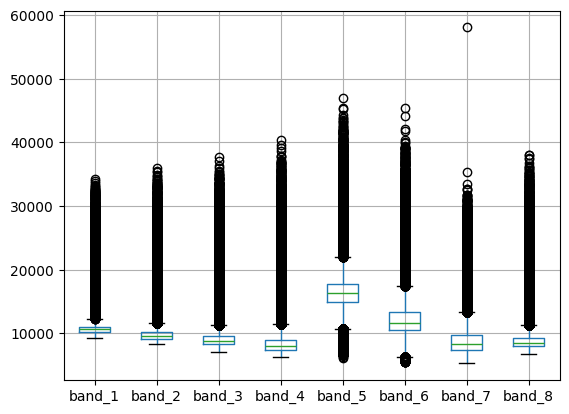

In [16]:
#kode untuk pencarian anomaly (boxplot)
boxplot_fields = ['band_1', 'band_2', 'band_3', 'band_4', 'band_5', 'band_6', 'band_7', 'band_8']
dataset.boxplot(column=boxplot_fields)
plt.show()

### 3.1.3 Data Anomaly 

In [17]:
dataset[(dataset['longitude'] <= 0) & (dataset['latitude'] <= 0)]

,longitude,latitude,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,gcvi,ndbi,mndwi,ndmi,lswi,lithology


# 4. Exploratory Data Analysis

## 4.1. Feature Engineering

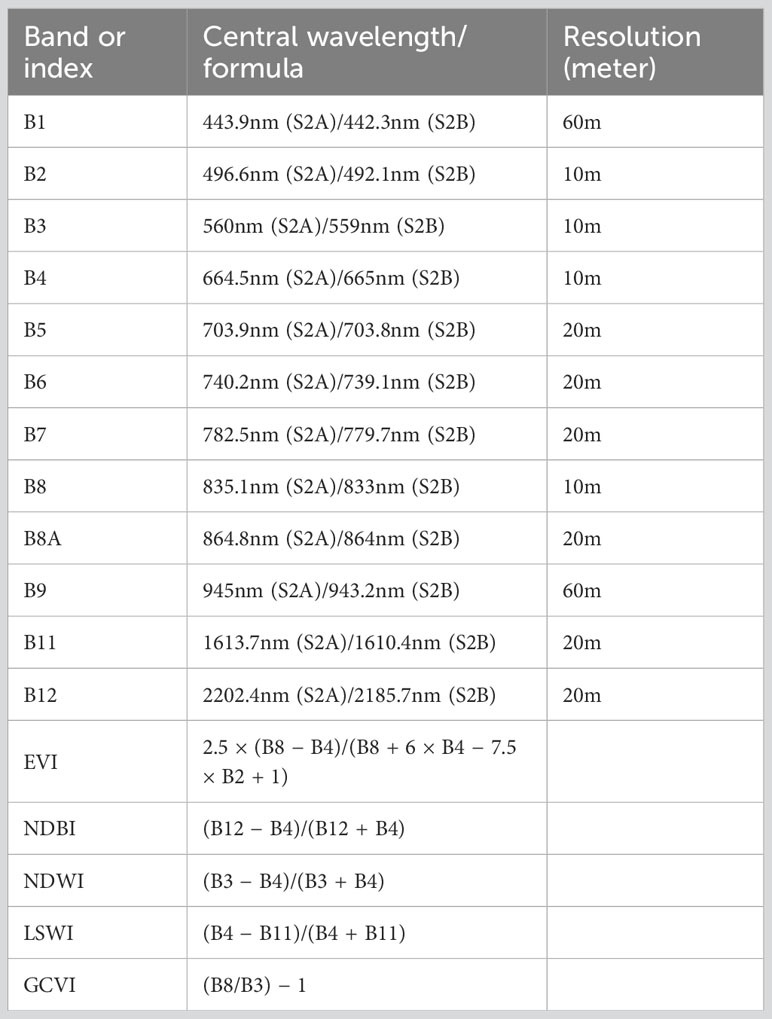

In [19]:
#penentuan nilai EVI
dataset['evi'] = 2.5 * (dataset["band_8"] - dataset["band_4"])/(dataset["band_8"] + 6 * dataset["band_4"] - 7.5 * dataset["band_2"] + 1)
dataset

,longitude,latitude,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,gcvi,ndbi,mndwi,ndmi,lswi,lithology,evi
0,401705.0,9135585,10217.894531,9190.894531,8345.894531,7266.894531,18536.894531,10657.894531,7224.894531,7839.894531,-0.060629,-0.269727,-0.121556,0.269727,-0.529450,Sandstone,-0.081907
1,408155.0,9148235,9652.112305,8666.112305,7840.112305,6874.112305,15347.112305,9524.112305,6977.112305,7413.112305,-0.054464,-0.233978,-0.096893,0.233978,-0.542735,Sandstone,-0.082481
2,404305.0,9131785,10535.749023,9489.749023,8625.749023,7553.749023,17332.750000,10223.749023,7025.749023,8161.749023,-0.053792,-0.257825,-0.084703,0.257825,-0.520420,Sandstone,-0.085935
3,397055.0,9126785,11898.645508,10979.645508,9991.645508,9305.645508,15723.645508,12117.645508,9244.645508,9564.645508,-0.042736,-0.129451,-0.096095,0.129451,-0.372010,Conglomerate,-0.038205
4,410905.0,9141085,10207.564453,9266.564453,8476.564453,7737.564941,13935.564453,10985.564453,8165.564941,7952.564941,-0.061817,-0.118293,-0.128805,0.118293,-0.518406,Sandstone,-0.035548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141239,411605.0,9124385,10866.531250,10005.531250,9134.531250,8834.531250,10732.531250,7752.531738,6418.531738,8988.531250,-0.015983,-0.161064,0.081756,0.161064,-0.467656,Conglomerate,-0.029514
141240,412805.0,9120035,11160.316406,10399.316406,9921.316406,10035.316406,15049.316406,15623.316406,11777.316406,9887.316406,-0.003427,0.018703,-0.223065,-0.018703,-0.422737,Conglomerate,0.046867
141241,410505.0,9147035,9921.672852,8954.672852,8118.672852,7467.672852,13161.672852,9898.672852,7605.672852,7824.672852,-0.036213,-0.141396,-0.098702,0.141396,-0.528219,Sandstone,-0.061432
141242,411055.0,9140935,10403.692383,9436.692383,8591.692383,7879.692871,14682.692383,11543.692383,8534.692383,7955.692871,-0.074025,-0.119613,-0.146487,0.119613,-0.507294,Sandstone,-0.012226


## 4.2. Descriptive Analysis

### 4.2.1. Statistics Data

In [34]:
geo_fields = ['band_1', 'band_2', 'band_3', 'band_4', 'band_5', 'band_6', 'band_7', 'band_8', 'gcvi', 'ndbi', 'mndwi', 'ndmi', 'lswi']
dataset[geo_fields].describe()

,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,gcvi,ndbi,mndwi,ndmi,lswi
count,141244.000000,141244.000000,141244.000000,141244.000000,141244.000000,141244.000000,141244.000000,141244.000000,141244.000000,141244.000000,141244.000000,141244.000000,141244.000000
mean,10951.510104,10063.168645,9329.348865,8644.826781,16381.819419,12085.773456,8814.251663,9012.293343,-0.035610,-0.154703,-0.123507,0.154703,-0.473824
std,1965.451086,2164.827861,2295.190167,2612.458833,3155.467698,3115.522129,2488.961491,2397.632393,0.049573,0.083880,0.073523,0.083880,0.094342
min,9259.216797,8247.319336,7027.327637,6224.327637,6138.737793,5520.970215,5260.890137,6702.319824,-0.592912,-0.422205,-0.360329,-0.167759,-0.579948
25%,10127.857422,9157.887207,8340.666260,7411.792358,14911.979492,10453.620605,7335.867188,7938.736084,-0.058183,-0.222875,-0.168916,0.092245,-0.523967
50%,10593.083984,9623.828125,8836.111328,8000.933350,16370.314453,11674.612305,8244.824219,8448.562500,-0.042373,-0.166293,-0.133197,0.166293,-0.499787
75%,10999.399902,10136.338867,9496.577148,8997.491699,17756.959961,13255.602783,9721.471436,9257.304932,-0.018624,-0.092245,-0.094327,0.222875,-0.459233
max,34209.468750,35952.468750,37739.468750,40370.468750,47025.468750,45378.726562,58066.726562,38063.753906,0.877659,0.167759,0.425581,0.422205,0.291980


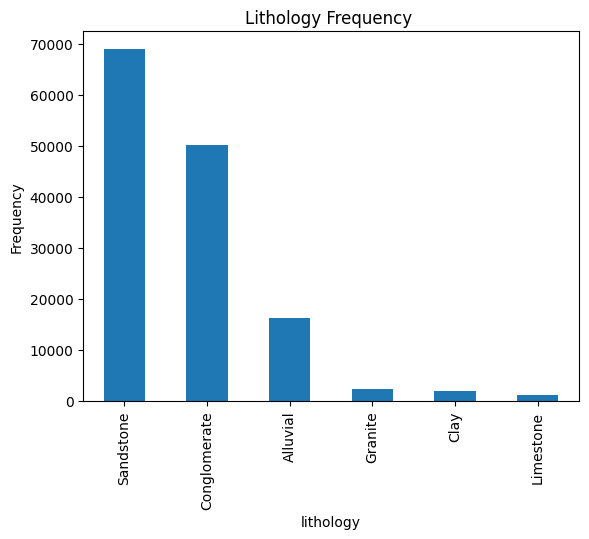

In [30]:
dataset['lithology'].value_counts().plot(kind='bar')
plt.title('Lithology Frequency ')
plt.ylabel('Frequency')
plt.show()

### 4.2.2. Visualization Data

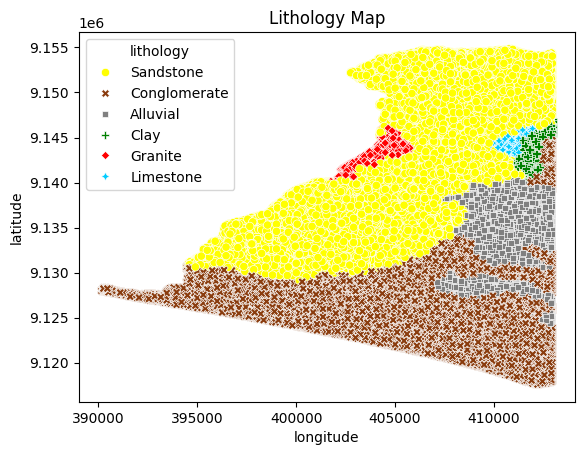

In [48]:
sns.scatterplot(data=dataset, x='longitude',
                y='latitude', palette = ['yellow', '#8a3c0e', 'grey', 'green', 'red', '#00ccff'],
                hue='lithology', style='lithology')
plt.title('Lithology Map')
plt.show()
                

### 4.2.3. Heatmap Correlation

In [35]:
dataset[geo_fields].corr()

,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,gcvi,ndbi,mndwi,ndmi,lswi
band_1,1.000000,0.999099,0.992052,0.982515,0.608871,0.794738,0.859164,0.964606,0.145745,0.361976,0.104639,-0.361976,0.962338
band_2,0.999099,1.000000,0.994668,0.987421,0.612783,0.806774,0.870072,0.968088,0.150264,0.375080,0.087456,-0.375080,0.966909
band_3,0.992052,0.994668,1.000000,0.994710,0.641411,0.843372,0.894736,0.967230,0.133268,0.396775,0.029111,-0.396775,0.973222
band_4,0.982515,0.987421,0.994710,1.000000,0.605212,0.865003,0.921848,0.966164,0.153529,0.470658,-0.010876,-0.470658,0.980324
band_5,0.608871,0.612783,0.641411,0.605212,1.000000,0.712862,0.592572,0.605387,0.002903,-0.151130,-0.376170,0.151130,0.575656
band_6,0.794738,0.806774,0.843372,0.865003,0.712862,1.000000,0.968540,0.818039,0.143451,0.575870,-0.499263,-0.575870,0.853314
band_7,0.859164,0.870072,0.894736,0.921848,0.592572,0.968540,1.000000,0.872444,0.169590,0.654544,-0.345219,-0.654544,0.908773
band_8,0.964606,0.968088,0.967230,0.966164,0.605387,0.818039,0.872444,1.000000,0.368212,0.407889,0.021278,-0.407889,0.947608
gcvi,0.145745,0.150264,0.133268,0.153529,0.002903,0.143451,0.169590,0.368212,1.000000,0.205272,-0.047836,-0.205272,0.166605
ndbi,0.361976,0.375080,0.396775,0.470658,-0.151130,0.575870,0.654544,0.407889,0.205272,1.000000,-0.343866,-1.000000,0.498710


## 4.4. Inferential Analysis

<b> Coming Soon! </b>

# 5. Modelling

## 5.1. Data Transformation

### 5.1.1. Dummies Data

In [53]:
dataset_ml=dataset.copy()
dataset_ml

,longitude,latitude,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,gcvi,ndbi,mndwi,ndmi,lswi,lithology,evi
0,401705.0,9135585,10217.894531,9190.894531,8345.894531,7266.894531,18536.894531,10657.894531,7224.894531,7839.894531,-0.060629,-0.269727,-0.121556,0.269727,-0.529450,Sandstone,-0.081907
1,408155.0,9148235,9652.112305,8666.112305,7840.112305,6874.112305,15347.112305,9524.112305,6977.112305,7413.112305,-0.054464,-0.233978,-0.096893,0.233978,-0.542735,Sandstone,-0.082481
2,404305.0,9131785,10535.749023,9489.749023,8625.749023,7553.749023,17332.750000,10223.749023,7025.749023,8161.749023,-0.053792,-0.257825,-0.084703,0.257825,-0.520420,Sandstone,-0.085935
3,397055.0,9126785,11898.645508,10979.645508,9991.645508,9305.645508,15723.645508,12117.645508,9244.645508,9564.645508,-0.042736,-0.129451,-0.096095,0.129451,-0.372010,Conglomerate,-0.038205
4,410905.0,9141085,10207.564453,9266.564453,8476.564453,7737.564941,13935.564453,10985.564453,8165.564941,7952.564941,-0.061817,-0.118293,-0.128805,0.118293,-0.518406,Sandstone,-0.035548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141239,411605.0,9124385,10866.531250,10005.531250,9134.531250,8834.531250,10732.531250,7752.531738,6418.531738,8988.531250,-0.015983,-0.161064,0.081756,0.161064,-0.467656,Conglomerate,-0.029514
141240,412805.0,9120035,11160.316406,10399.316406,9921.316406,10035.316406,15049.316406,15623.316406,11777.316406,9887.316406,-0.003427,0.018703,-0.223065,-0.018703,-0.422737,Conglomerate,0.046867
141241,410505.0,9147035,9921.672852,8954.672852,8118.672852,7467.672852,13161.672852,9898.672852,7605.672852,7824.672852,-0.036213,-0.141396,-0.098702,0.141396,-0.528219,Sandstone,-0.061432
141242,411055.0,9140935,10403.692383,9436.692383,8591.692383,7879.692871,14682.692383,11543.692383,8534.692383,7955.692871,-0.074025,-0.119613,-0.146487,0.119613,-0.507294,Sandstone,-0.012226


In [54]:
dataset_ml.dtypes

longitude    float64
latitude       int64
band_1       float64
band_2       float64
band_3       float64
band_4       float64
band_5       float64
band_6       float64
band_7       float64
band_8       float64
gcvi         float64
ndbi         float64
mndwi        float64
ndmi         float64
lswi         float64
lithology     object
evi          float64
dtype: object

In [55]:
dataset_ml['lithology'].unique()

array(['Sandstone', 'Conglomerate', 'Alluvial', 'Clay', 'Granite',
       'Limestone'], dtype=object)

In [63]:
pd.set_option('future.no_silent_downcasting', True)

In [66]:
#Kamus litologi
num_lith={'Sandstone':1, 'Conglomerate':2, 'Alluvial':3, 'Clay': 4, 'Granite': 5,
       'Limestone':6}
dataset_ml['num_lithology']=dataset_ml['lithology'].replace(num_lith)
dataset_ml

,longitude,latitude,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,gcvi,ndbi,mndwi,ndmi,lswi,lithology,evi,num_lithology
0,401705.0,9135585,10217.894531,9190.894531,8345.894531,7266.894531,18536.894531,10657.894531,7224.894531,7839.894531,-0.060629,-0.269727,-0.121556,0.269727,-0.529450,Sandstone,-0.081907,1
1,408155.0,9148235,9652.112305,8666.112305,7840.112305,6874.112305,15347.112305,9524.112305,6977.112305,7413.112305,-0.054464,-0.233978,-0.096893,0.233978,-0.542735,Sandstone,-0.082481,1
2,404305.0,9131785,10535.749023,9489.749023,8625.749023,7553.749023,17332.750000,10223.749023,7025.749023,8161.749023,-0.053792,-0.257825,-0.084703,0.257825,-0.520420,Sandstone,-0.085935,1
3,397055.0,9126785,11898.645508,10979.645508,9991.645508,9305.645508,15723.645508,12117.645508,9244.645508,9564.645508,-0.042736,-0.129451,-0.096095,0.129451,-0.372010,Conglomerate,-0.038205,2
4,410905.0,9141085,10207.564453,9266.564453,8476.564453,7737.564941,13935.564453,10985.564453,8165.564941,7952.564941,-0.061817,-0.118293,-0.128805,0.118293,-0.518406,Sandstone,-0.035548,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141239,411605.0,9124385,10866.531250,10005.531250,9134.531250,8834.531250,10732.531250,7752.531738,6418.531738,8988.531250,-0.015983,-0.161064,0.081756,0.161064,-0.467656,Conglomerate,-0.029514,2
141240,412805.0,9120035,11160.316406,10399.316406,9921.316406,10035.316406,15049.316406,15623.316406,11777.316406,9887.316406,-0.003427,0.018703,-0.223065,-0.018703,-0.422737,Conglomerate,0.046867,2
141241,410505.0,9147035,9921.672852,8954.672852,8118.672852,7467.672852,13161.672852,9898.672852,7605.672852,7824.672852,-0.036213,-0.141396,-0.098702,0.141396,-0.528219,Sandstone,-0.061432,1
141242,411055.0,9140935,10403.692383,9436.692383,8591.692383,7879.692871,14682.692383,11543.692383,8534.692383,7955.692871,-0.074025,-0.119613,-0.146487,0.119613,-0.507294,Sandstone,-0.012226,1


### 5.1.2. Normalization Data

Can you imagine that if the each data has different variety data, the model that we get will be <b>lack</b>. So, we have to normalize data each parameter. There are several normalize which you can use:

1. Min-Max Normalization
2. Mean Normalization
3. Biased Normalization

In [67]:
# (x - min(x)) / (max(x) - min(x))
def minMaxNormalization(dataset_ml_col):
    return (dataset_ml_col - dataset_ml_col.min())/(dataset_ml_col.max() - dataset_ml_col.min())

# (x - mean(x)) / std(x)
def meanNormalization(dataset_ml_col):
    return (dataset_ml_col - dataset_ml_col.mean())/dataset_ml_col.std()
    
def normalization(dataset_ml, method):
    for col in dataset_ml.columns:
        if col not in ['longitude', 'latitude', 'lithology', 'num_lithology']:
            if method == 'Min-Max':
                dataset_ml[col] = minMaxNormalization(dataset_ml[col])
            elif method == 'Mean':
                dataset_ml[col] = meanNormalization(dataset_ml[col])

    return dataset_ml

In [68]:
dataset_ml = normalization(dataset_ml, 'Min-Max')
dataset_ml

,longitude,latitude,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,gcvi,ndbi,mndwi,ndmi,lswi,lithology,evi,num_lithology
0,401705.0,9135585,0.038424,0.034058,0.042933,0.030532,0.303232,0.128881,0.037193,0.036273,0.361957,0.258452,0.303817,0.741548,0.057916,Sandstone,0.865107,1
1,408155.0,9148235,0.015747,0.015116,0.026465,0.019030,0.225217,0.100436,0.032501,0.022665,0.366149,0.319049,0.335199,0.680951,0.042679,Sandstone,0.865107,1
2,404305.0,9131785,0.051163,0.044845,0.052045,0.038933,0.273781,0.117989,0.033422,0.046536,0.366606,0.278627,0.350710,0.721373,0.068272,Sandstone,0.865106,1
3,397055.0,9126785,0.105788,0.098622,0.096519,0.090239,0.234426,0.165505,0.075442,0.091269,0.374124,0.496223,0.336214,0.503777,0.238481,Conglomerate,0.865124,2
4,410905.0,9141085,0.038010,0.036789,0.047188,0.044316,0.190693,0.137102,0.055007,0.039866,0.361149,0.515136,0.294593,0.484864,0.070582,Sandstone,0.865125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141239,411605.0,9124385,0.064421,0.063462,0.068611,0.076442,0.112354,0.055988,0.021923,0.072899,0.392316,0.442639,0.562513,0.557361,0.128786,Conglomerate,0.865127,2
141240,412805.0,9120035,0.076196,0.077675,0.094229,0.111608,0.217933,0.253460,0.123404,0.101558,0.400855,0.747348,0.174655,0.252652,0.180303,Conglomerate,0.865156,2
141241,410505.0,9147035,0.026551,0.025531,0.035535,0.036412,0.171766,0.109833,0.044404,0.035788,0.378560,0.475976,0.332896,0.524024,0.059328,Sandstone,0.865115,1
141242,411055.0,9140935,0.045870,0.042930,0.050936,0.048479,0.208966,0.151105,0.061997,0.039965,0.352847,0.512899,0.272095,0.487101,0.083326,Sandstone,0.865134,1


## 5.2. Machine Learning Process

### 5.2.1. Splitting Data

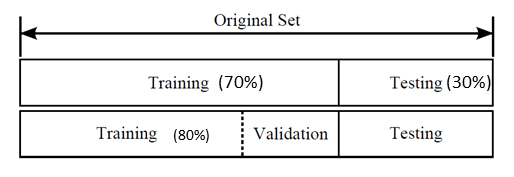

In [180]:
def prepare_train_test_data(dataset_ml, test_size):
    X = dataset_ml[[col for col in dataset_ml.columns if col not in ['num_lithology', 'lithology']]]
    Y = dataset_ml['num_lithology']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                        random_state=32,  
                                                        test_size=test_size, 
                                                        shuffle=True)
    par_input = [col for col in X.columns if col not in ['longitude', 'latitude']]

    input_train = X_train[par_input].values
    input_test = X_test[par_input].values
    output_train = Y_train.values
    output_test = Y_test.values
    
    output_train = change_obj_to_int_arrays(output_train)
    output_test = change_obj_to_int_arrays(output_test)
    return input_train, input_test, output_train, output_test
    
def change_obj_to_int_arrays(arrays:[]):
    return [int(obj) for obj in arrays]

In [181]:
input_train, input_test, output_train, output_test = prepare_train_test_data(dataset_ml, 0.3)

### 5.2.2. Model Fitting

In [177]:
def model_fitting(model, input_train, input_test, output_train, output_test):
    model.fit(input_train,output_train)
    predict_train = model.predict(input_train)
    predict_test = model.predict(input_test)
    print('### Model Accuracy - Train ### \n')
    print(classification_report(output_train, predict_train))
    print('Accuracy Score:', accuracy_score(output_train, predict_train))
    print('===========================================================')
    print('\n ### Model Accuracy - Test ###')
    print(classification_report(output_test, predict_test))
    print('Accuracy Score:', accuracy_score(output_test, predict_test))

In [204]:
model_fitting(RandomForestClassifier(), input_train, input_test, output_train, output_test)

KeyboardInterrupt: 

In [183]:
model_fitting(DecisionTreeClassifier(), input_train, input_test, output_train, output_test)

### Model Accuracy - Train ### 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     48346
           2       1.00      1.00      1.00     35200
           3       1.00      1.00      1.00     11437
           4       1.00      1.00      1.00      1328
           5       1.00      1.00      1.00      1682
           6       1.00      1.00      1.00       877

    accuracy                           1.00     98870
   macro avg       1.00      1.00      1.00     98870
weighted avg       1.00      1.00      1.00     98870

Accuracy Score: 1.0

 ### Model Accuracy - Test ###
              precision    recall  f1-score   support

           1       0.83      0.83      0.83     20655
           2       0.77      0.76      0.77     15076
           3       0.39      0.40      0.40      4950
           4       0.39      0.41      0.40       585
           5       0.27      0.27      0.27       740
           6       0.23      0.24      0.24    

In [ ]:
model_fitting(GaussianNB(), input_train, input_test, output_train, output_test)

In [191]:
model_fitting(KNeighborsClassifier(), input_train, input_test, output_train, output_test)

### Model Accuracy - Train ### 

              precision    recall  f1-score   support

           1       0.85      0.92      0.88     48346
           2       0.81      0.89      0.85     35200
           3       0.69      0.43      0.53     11437
           4       0.68      0.33      0.45      1328
           5       0.78      0.12      0.21      1682
           6       0.64      0.06      0.11       877

    accuracy                           0.82     98870
   macro avg       0.74      0.46      0.50     98870
weighted avg       0.81      0.82      0.81     98870

Accuracy Score: 0.8221806412460807

 ### Model Accuracy - Test ###
              precision    recall  f1-score   support

           1       0.81      0.88      0.84     20655
           2       0.75      0.83      0.79     15076
           3       0.43      0.25      0.32      4950
           4       0.43      0.18      0.26       585
           5       0.41      0.06      0.10       740
           6       0.21      0.0

In [ ]:
model_fittings = {"AdaBoostClassifier": AdaBoostClassifier() ,
"BaggingClassifier": BaggingClassifier() ,
"ExtraTreesClassifier": ExtraTreesClassifier() ,
"GradientBoostingClassifier": GradientBoostingClassifier() ,
"RandomForestClassifier": RandomForestClassifier() ,

"LogisticRegression": LogisticRegression() ,
"LogisticRegressionCV": LogisticRegressionCV() ,
"PassiveAggressiveClassifier": PassiveAggressiveClassifier() ,
"RidgeClassifier": RidgeClassifier() ,
"RidgeClassifierCV": RidgeClassifierCV() ,
"SGDClassifier": SGDClassifier() ,

"BernoulliNB": BernoulliNB() ,
"CategoricalNB": CategoricalNB() ,
"ComplementNB": ComplementNB() ,
"GaussianNB": GaussianNB() ,
"MultinomialNB": MultinomialNB() ,

"KNeighborsClassifier": KNeighborsClassifier() ,
"RadiusNeighborsClassifier": RadiusNeighborsClassifier() ,

"LinearSVC": LinearSVC() ,
"NuSVC": NuSVC() ,
"OneClassSVM": OneClassSVM() ,
"SVC": SVC() ,

"DecisionTreeClassifier": DecisionTreeClassifier() ,
"ExtraTreeClassifier": ExtraTreeClassifier() }


model_fittings

In [ ]:
for k, v in model_fittings.items():
    model_fitting(v, input_train, input_test, output_train, output_test)

### 5.2.3. Tuning Hyperparameter

<b> Cooming Soon! </b>

# 6. Evaluation Model

# Summary

This model has low accuracy score (< 0.5), so you have to improve this accuracy with several steps:

1. <b>Transform your categorical data.</b>
2. <b>Change your machine learning method.</b>
3. <b>Change the machine learning model.</b>


<b>So, this is you place to prove your skills in machine learning field!!! </b>